<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-To/blob/main/Jupyter%20Notebook%20Scripts/Pulse_Shapes_and_Envelopes_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook authored by Onri Jay Benally shows some plots to help visualize the process of how pulses are shaped to control a quantum chip.

- While Gaussian is prevalent due to its favorable spectral properties, sinusoidal or other shaped envelopes also exist and are actively used in various quantum computing architectures.
- The choice of envelope is dictated by the need to balance gate fidelity, spectral leakage, robustness against noise, and suppression of higher energy transitions.
- Optimal control techniques, such as GRAPE or CRAB, can generate tailored pulse shapes that might include sinusoidal modulations.

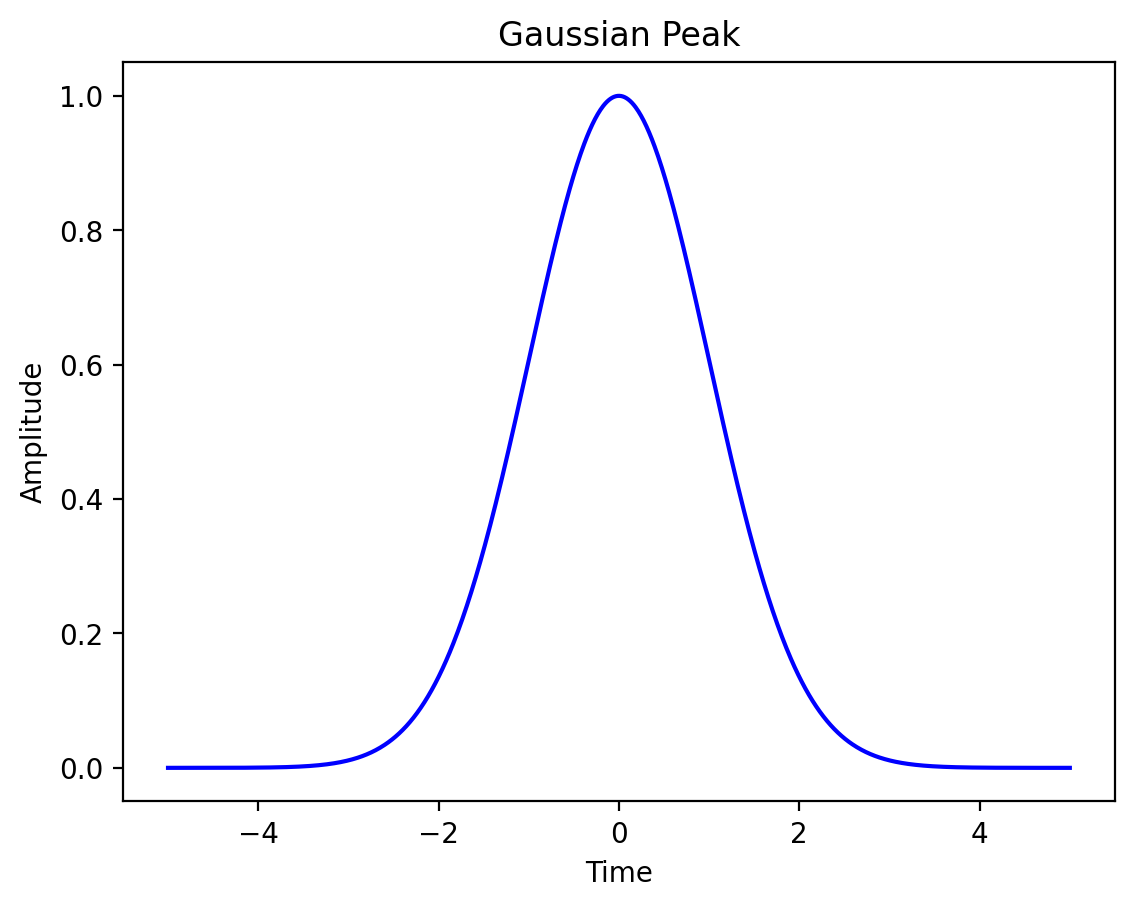

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Define the parameters for the Gaussian function
mean = 0
std_dev = 1
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_envelope = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Plot the Gaussian peak with blue color
plt.plot(time, gaussian_envelope, color='blue')
plt.title('Gaussian Peak')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

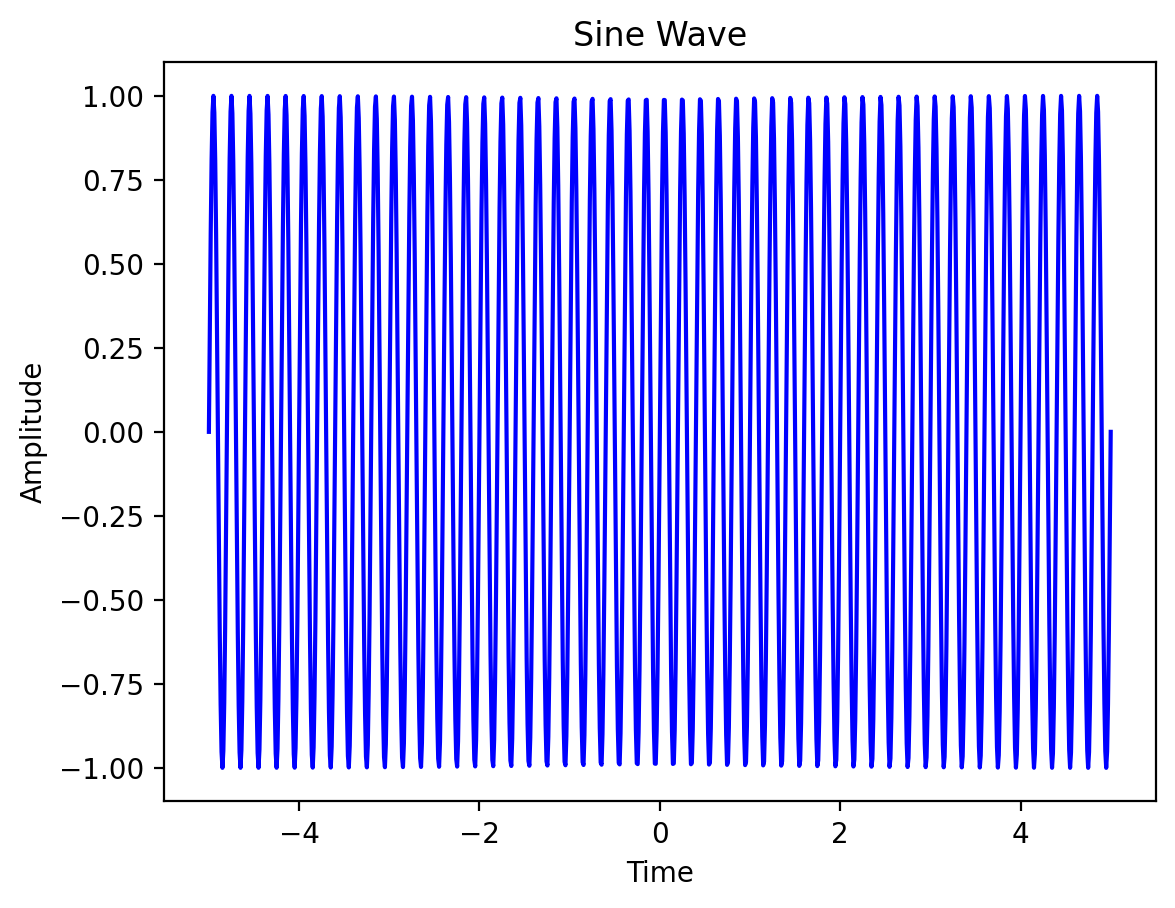

In [25]:
'''
This plot is a representation of a tone or frequency that is set to match the resonance frequency
of a physical device on a chip. It is like a bare carrier signal for quantum devices.
'''
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the sine wave
amplitude = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Plot the sine wave with blue color
plt.plot(time, sine_wave, color='blue')
plt.title('Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

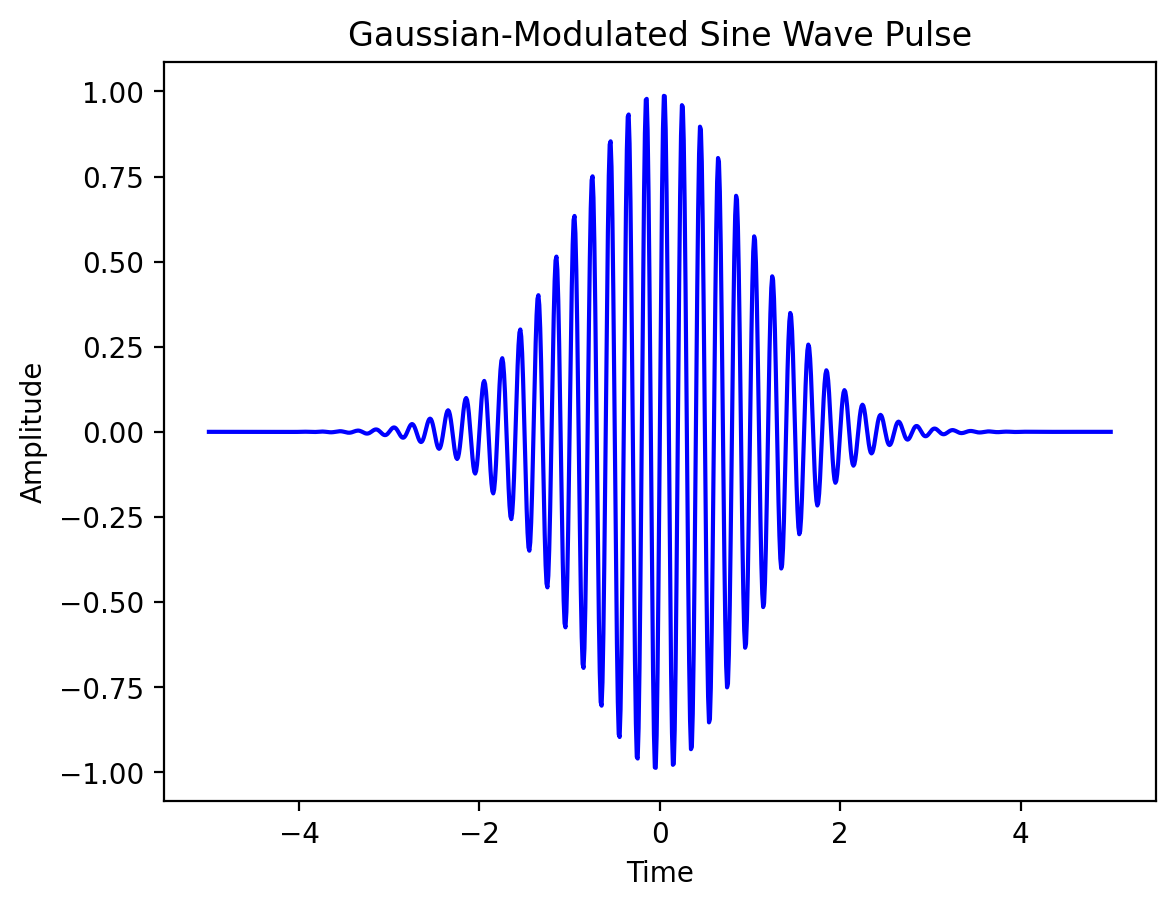

In [26]:
'''
Whe a
'''
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_envelope = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian envelope
gaussian_modulated_sine_wave = gaussian_envelope * sine_wave

# Plot the Gaussian-modulated sine wave with blue color
plt.plot(time, gaussian_modulated_sine_wave, color='blue')
plt.title('Gaussian-Modulated Sine Wave Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

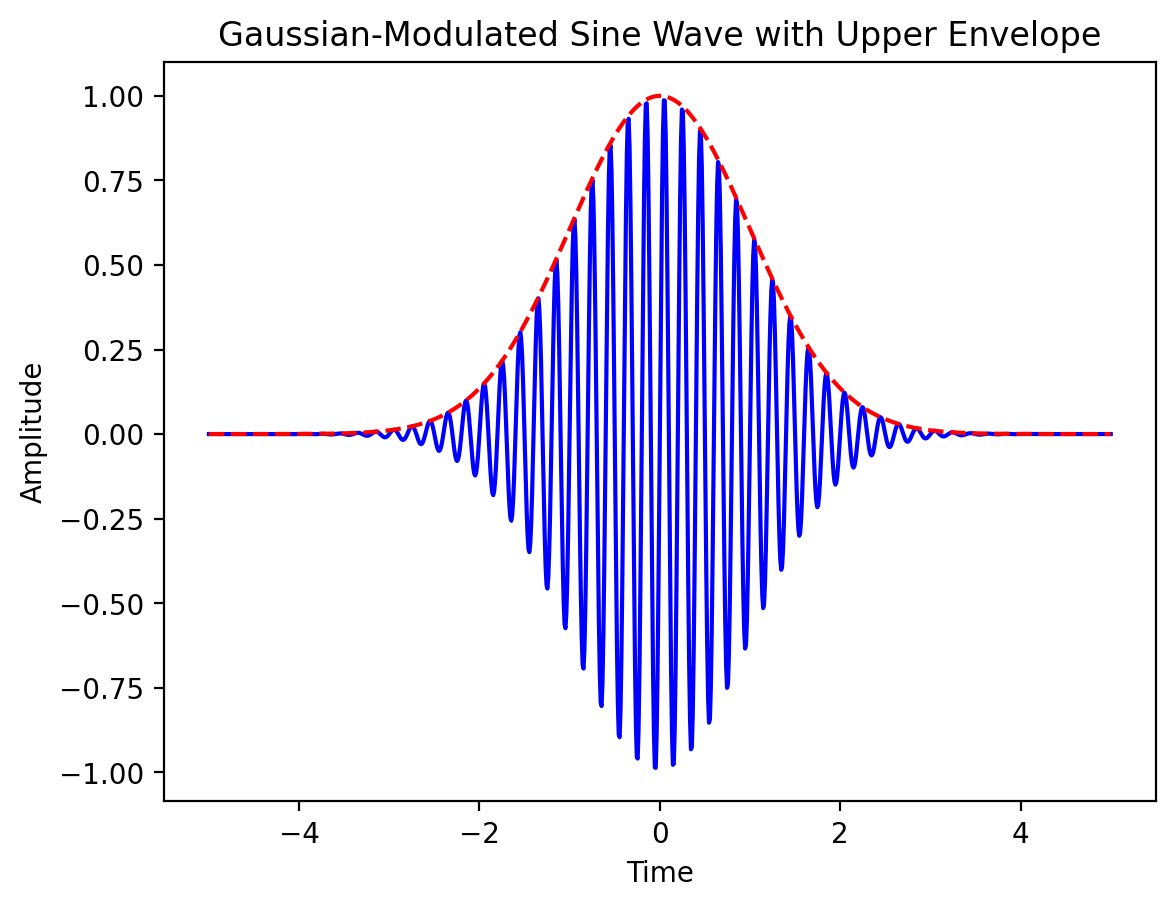

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_envelope = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian envelope
gaussian_modulated_sine_wave = gaussian_envelope * sine_wave

# Calculate the upper envelope of the modulated sine wave
upper_envelope = np.abs(gaussian_envelope)

# Plot the Gaussian-modulated sine wave and its upper envelope
plt.plot(time, gaussian_modulated_sine_wave, color='blue', label='Gaussian-Modulated Sine Wave Pulse')
plt.plot(time, upper_envelope, color='red', linestyle='dashed', label='Upper Envelope')
plt.title('Gaussian-Modulated Sine Wave with Upper Envelope')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.grid(False)
plt.show()


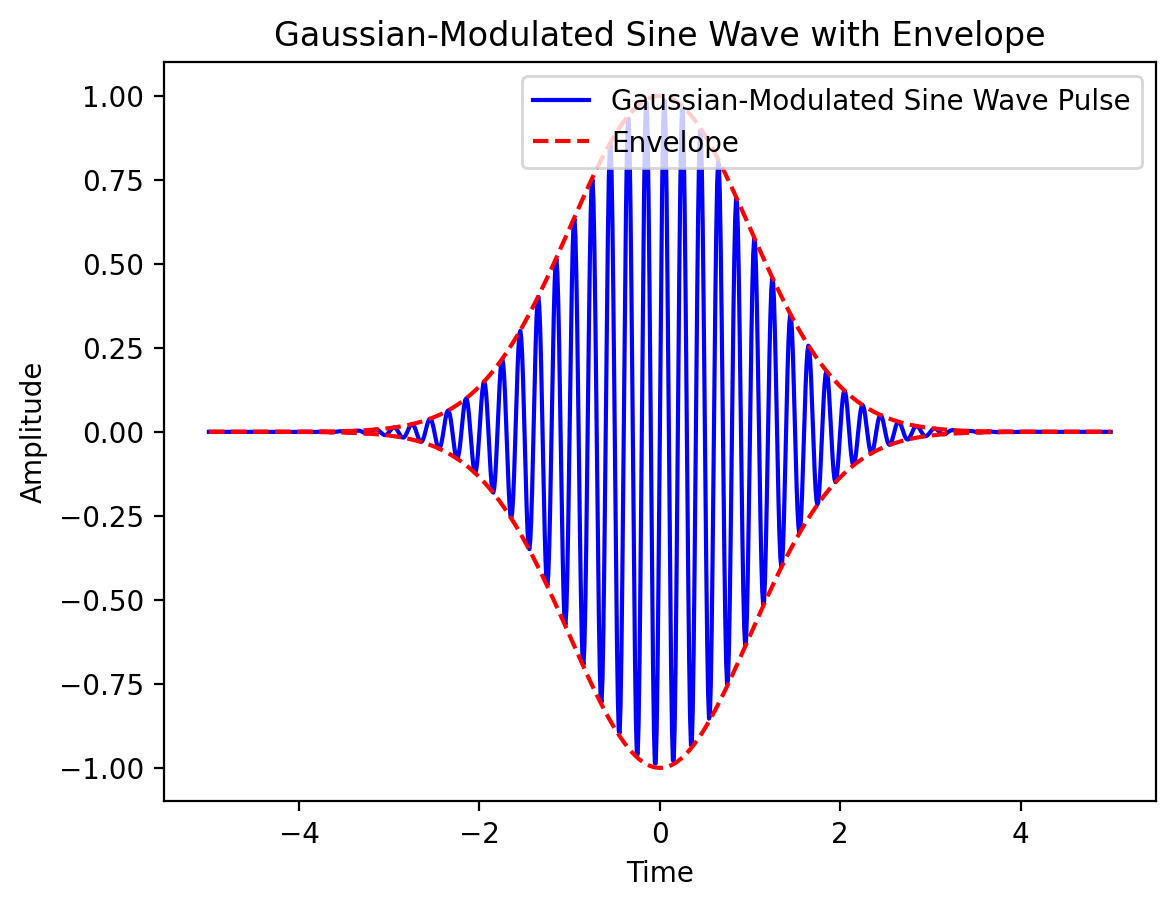

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian-modulated sine wave
amplitude = 1
mean = 0
std_dev = 1
frequency = 5  # Frequency of the sine wave
time = np.linspace(-5, 5, 1000)  # Generate time values from -5 to 5

# Calculate the Gaussian function
gaussian_envelope = np.exp(-(time - mean) ** 2 / (2 * std_dev ** 2))

# Calculate the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Modulate the sine wave with the Gaussian envelope
gaussian_modulated_sine_wave = gaussian_envelope * sine_wave

# Calculate the envelope of the modulated sine wave
envelope = np.abs(gaussian_envelope)

# Plot the Gaussian-modulated sine wave and its envelope
plt.plot(time, gaussian_modulated_sine_wave, color='blue', label='Gaussian-Modulated Sine Wave Pulse')
plt.plot(time, envelope, color='red', linestyle='dashed', label='Envelope')
plt.plot(time, -envelope, color='red', linestyle='dashed')  # Add the negative envelope for completeness
plt.title('Gaussian-Modulated Sine Wave with Envelope')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(False)
plt.show()


Below are some common pulse envelope shapes used to modulate a sine wave tone.

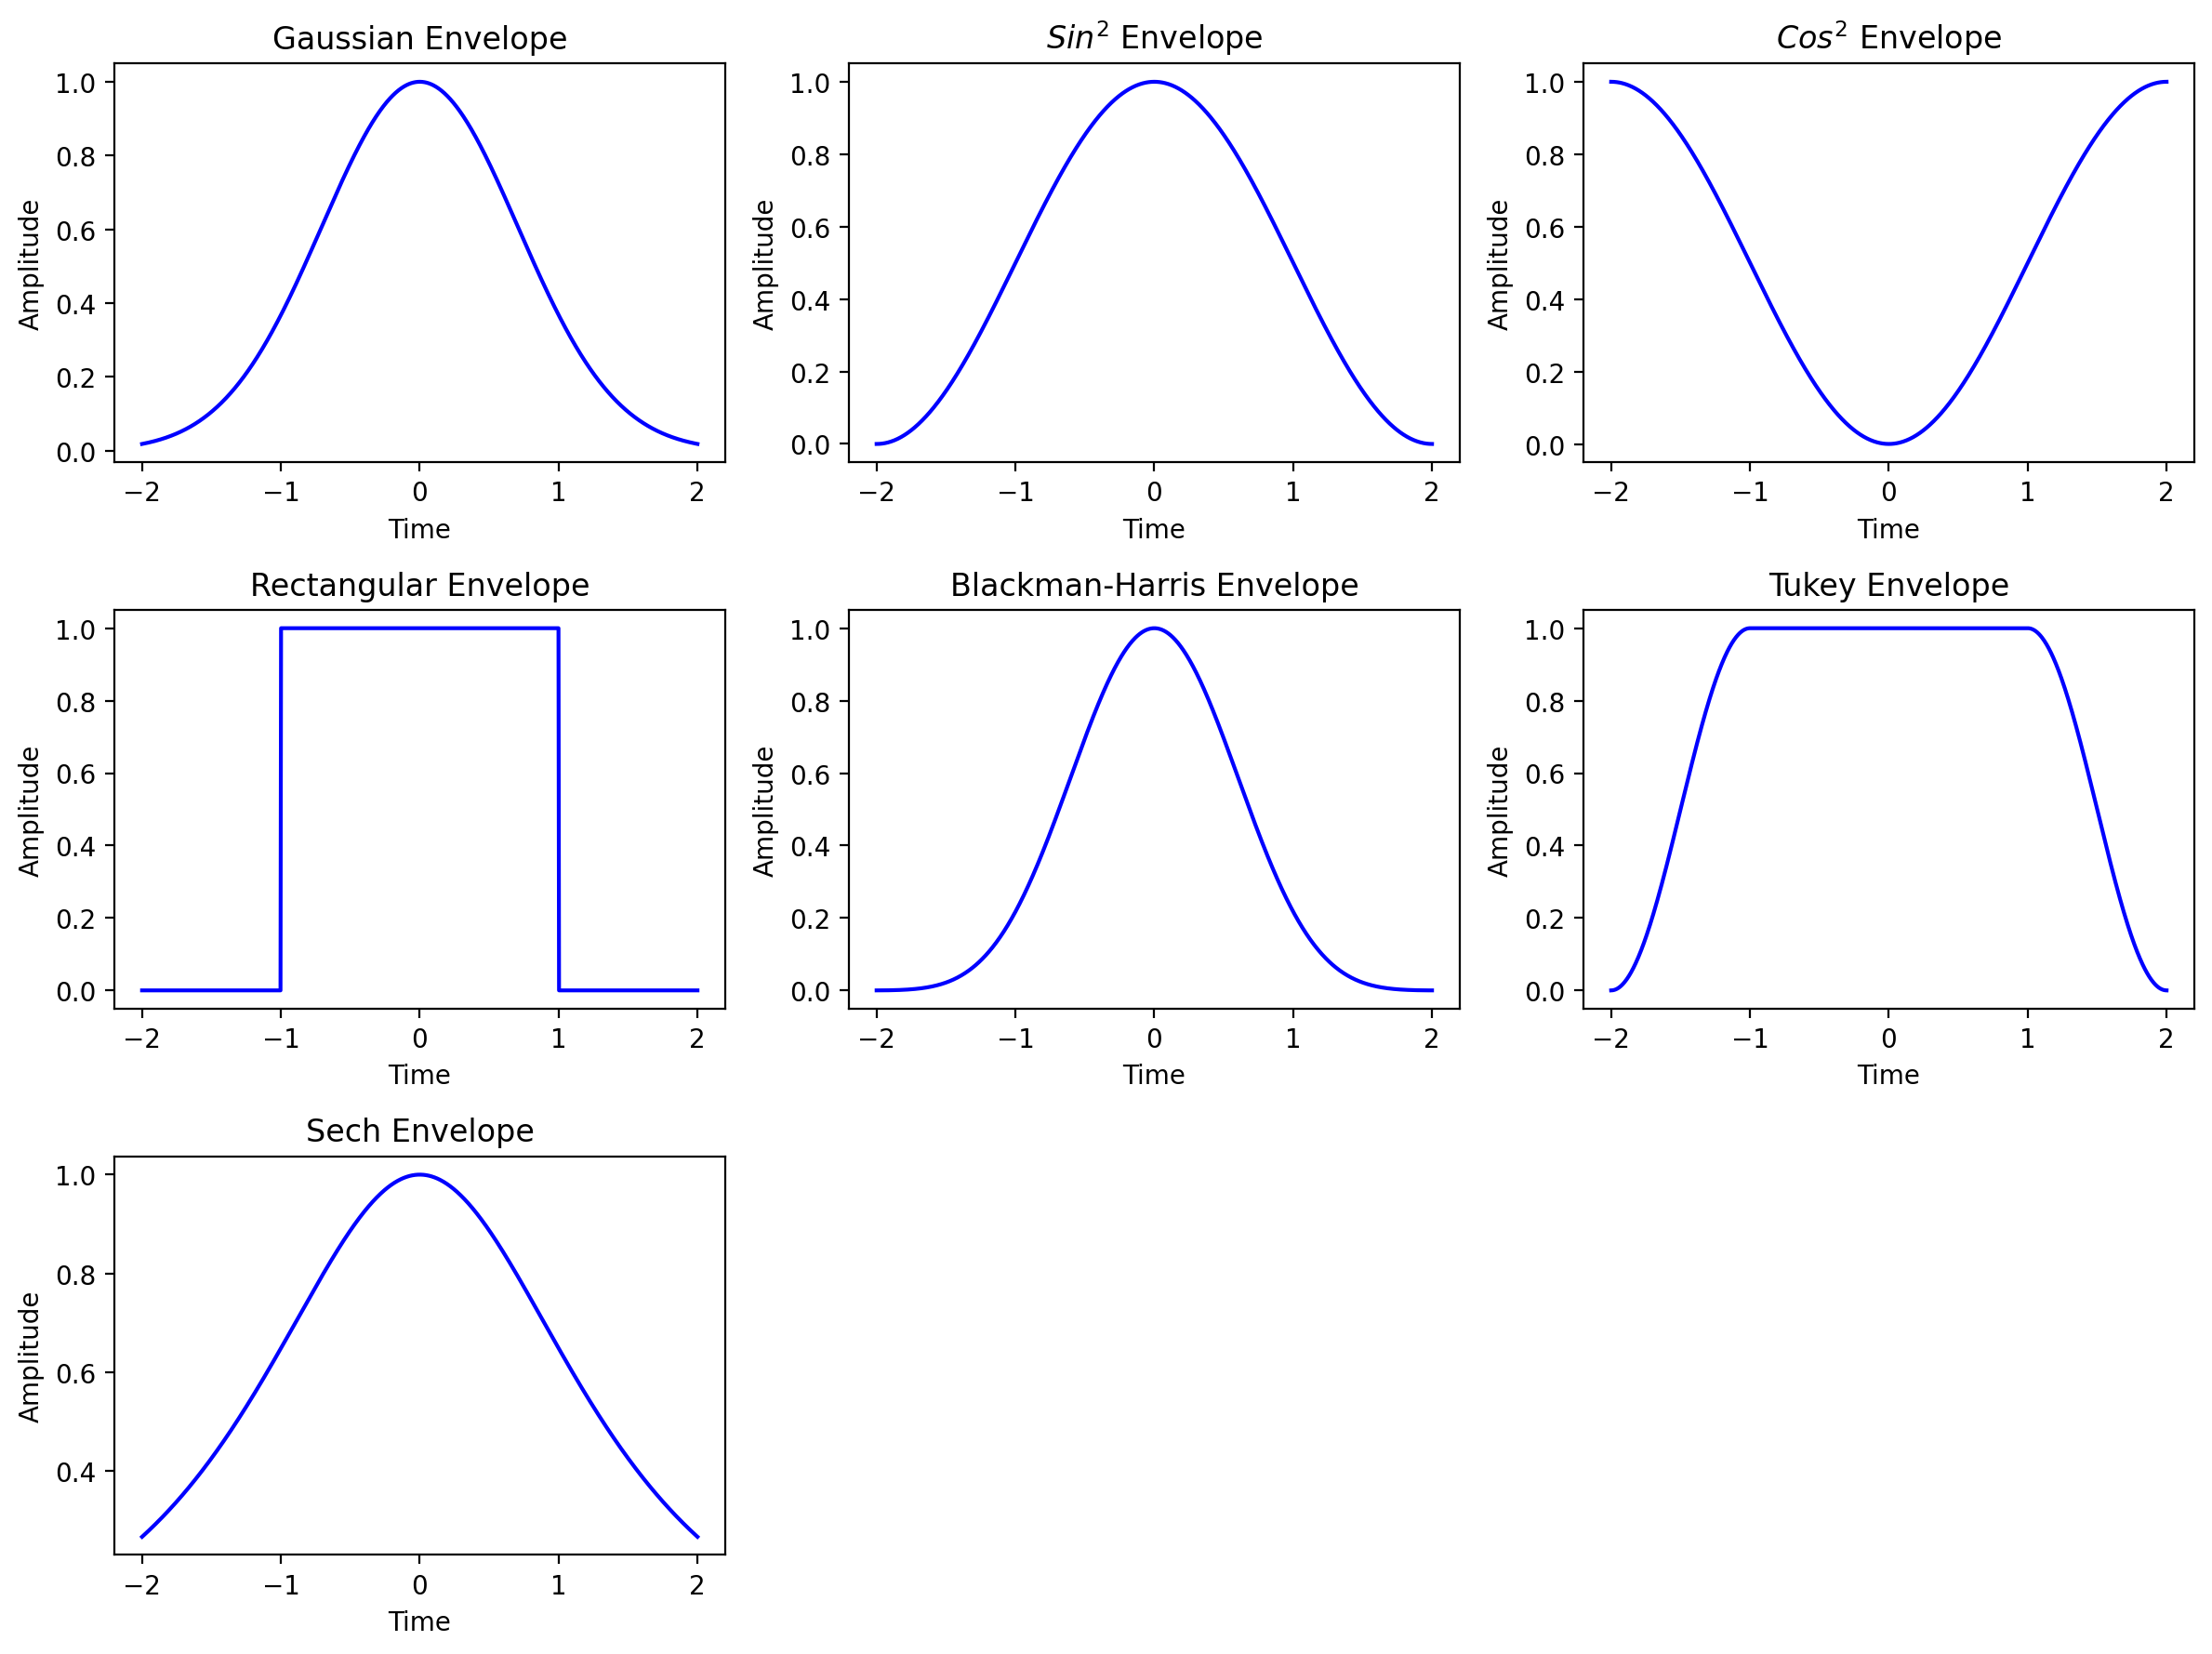

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
t = np.linspace(-2, 2, 1000)

# Define different pulse envelopes
gaussian = np.exp(-t**2)
sin2 = np.sin(np.pi * (t - t.min()) / (t.max() - t.min()))**2
cos2 = np.cos(np.pi * (t - t.min()) / (t.max() - t.min()))**2
rectangular = np.ones_like(t)
rectangular[np.abs(t) > 1] = 0
blackman_harris = blackmanharris(len(t))
tukey_envelope = tukey(len(t), alpha=0.5)
sech = 1 / np.cosh(t)

# List of envelopes and titles
envelopes = [(gaussian, "Gaussian Envelope"),
             (sin2, "$Sin^{2}$ Envelope"),
             (cos2, "$Cos^{2}$ Envelope"),
             (rectangular, "Rectangular Envelope"),
             (blackman_harris, "Blackman-Harris Envelope"),
             (tukey_envelope, "Tukey Envelope"),
             (sech, "Sech Envelope")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (envelope, title) in enumerate(envelopes):
    axes[i].plot(t, envelope, 'b')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    # axes[i].legend([title])

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


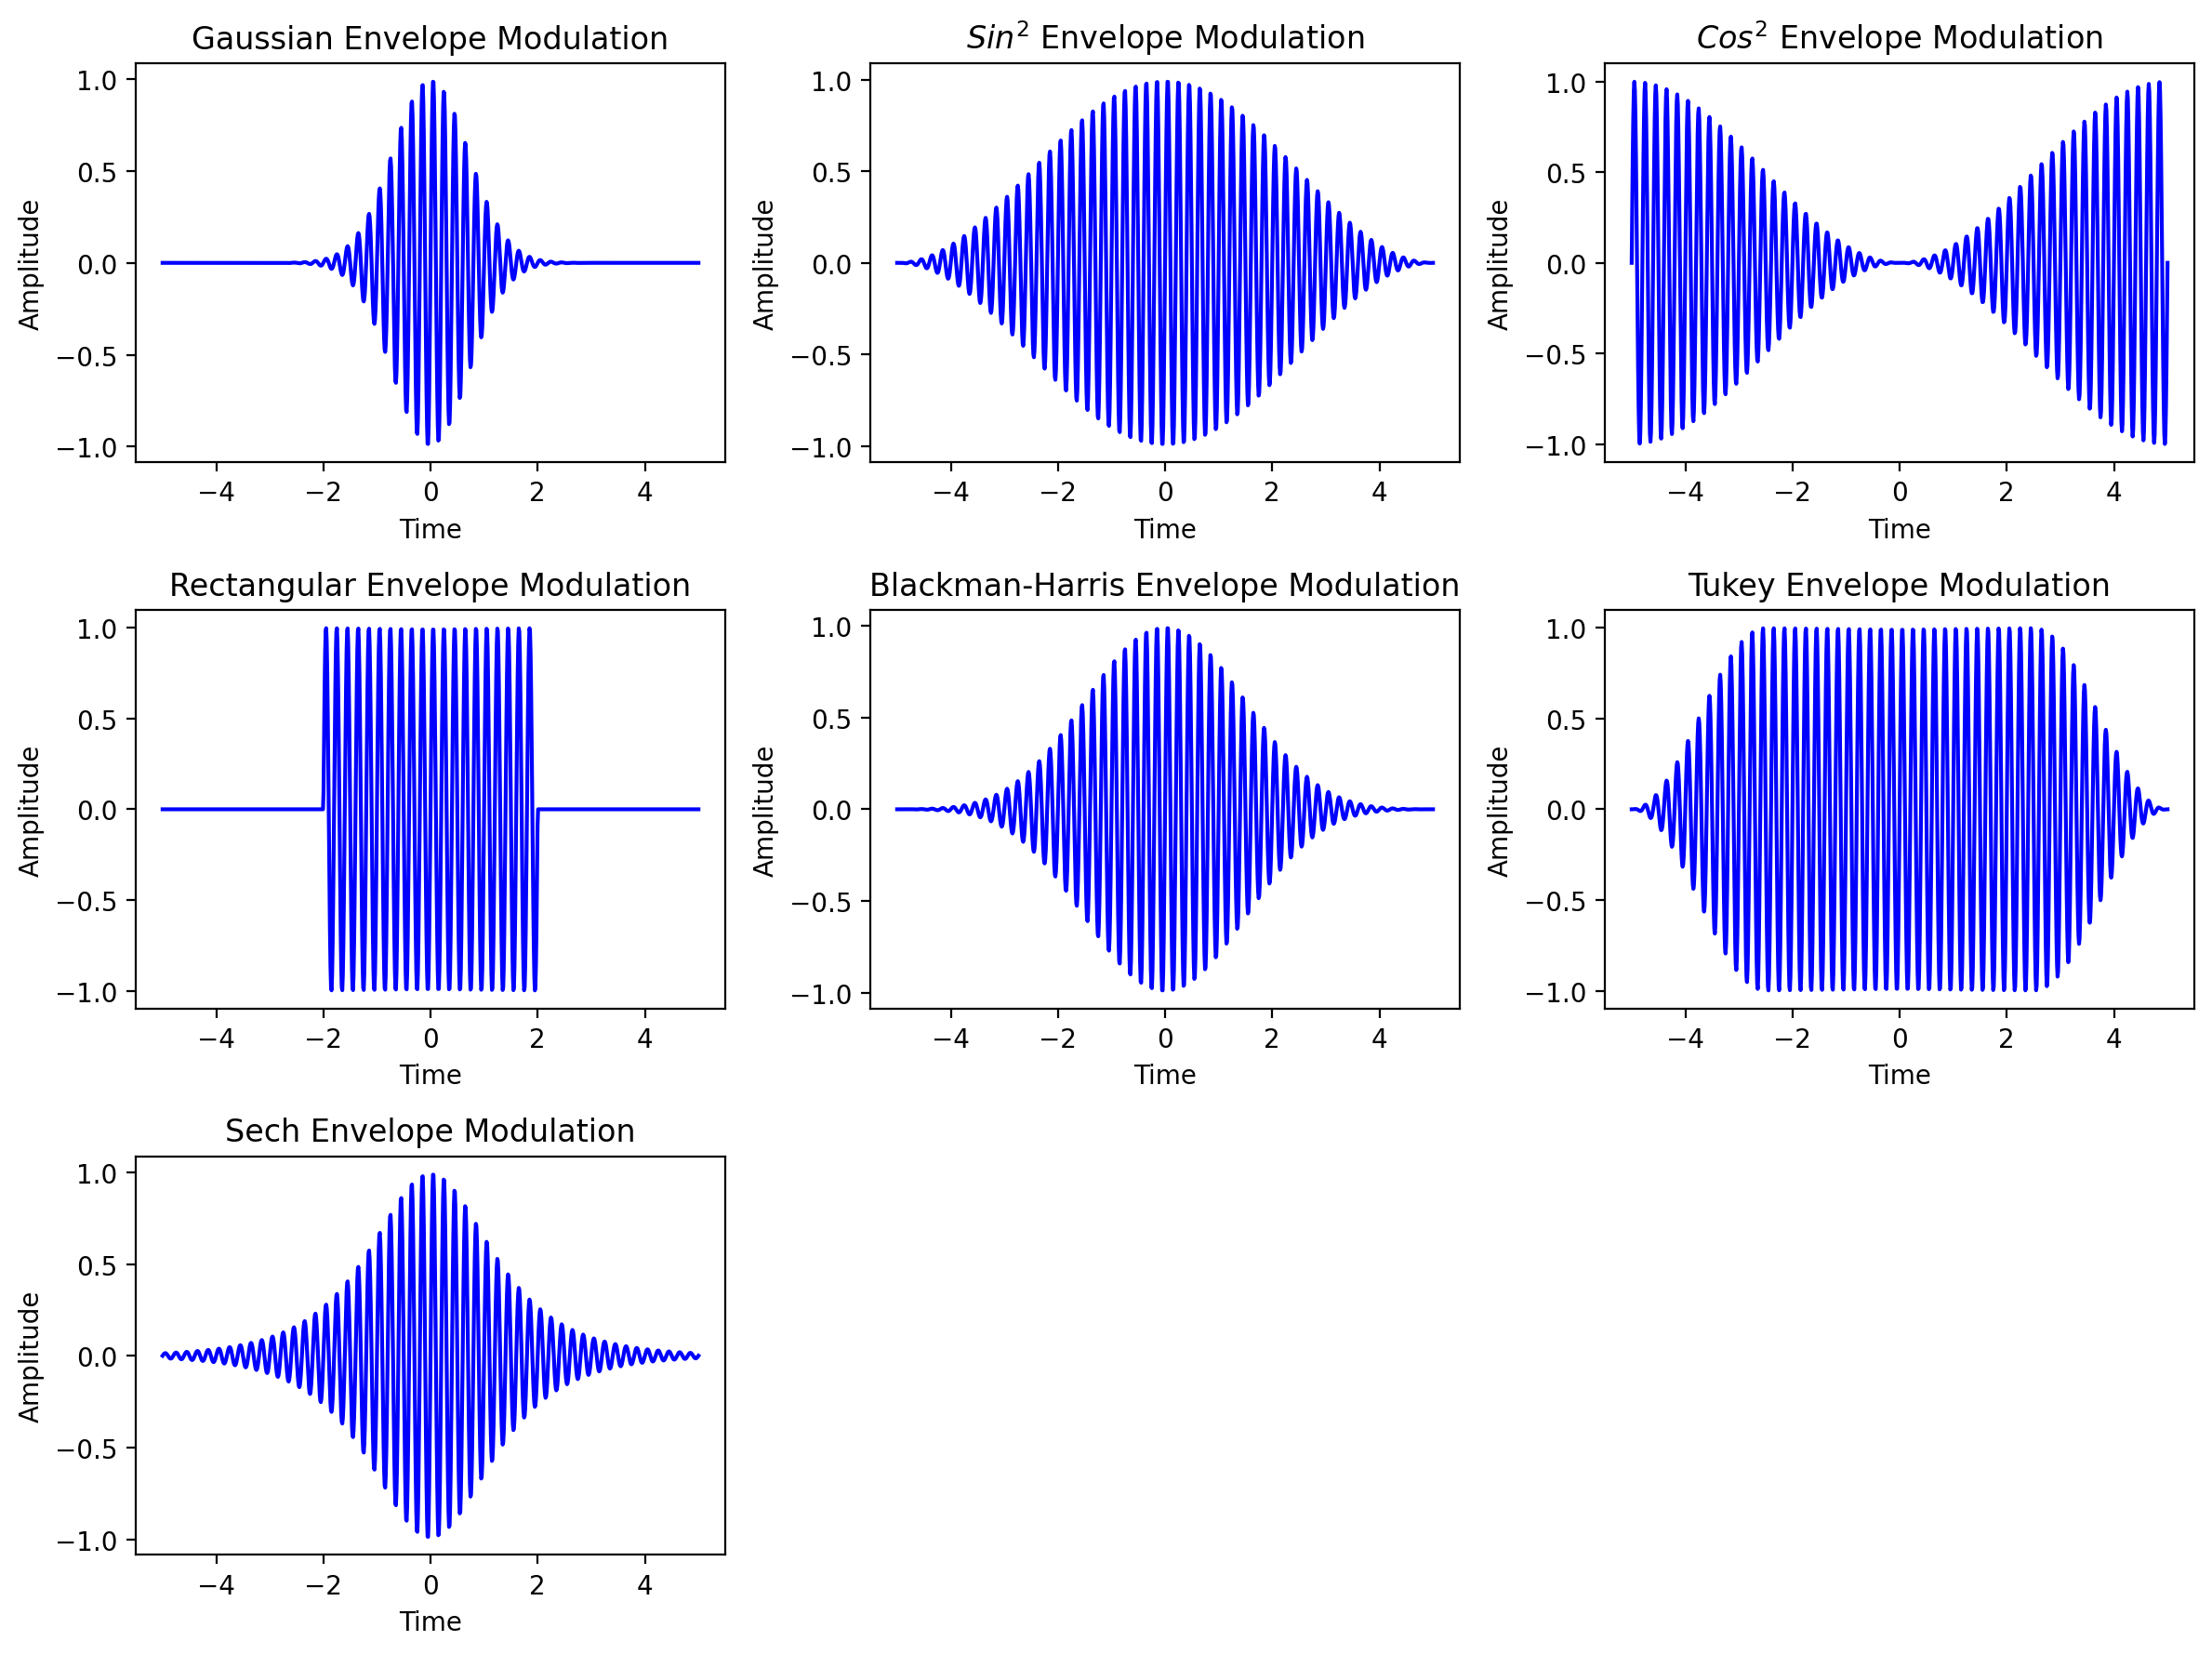

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
time = np.linspace(-5, 5, 1000)

# Define different pulse envelopes
gaussian = np.exp(-time**2)
sin2 = np.sin(np.pi * (time - time.min()) / (time.max() - time.min()))**2
cos2 = np.cos(np.pi * (time - time.min()) / (time.max() - time.min()))**2
rectangular = np.ones_like(time)
rectangular[np.abs(time) > 2] = 0
blackman_harris = blackmanharris(len(time))
tukey_envelope = tukey(len(time), alpha=0.5)
sech = 1 / np.cosh(time)

# Define sine wave parameters
amplitude = 1
frequency = 5  # Frequency of the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# List of envelopes and titles
envelopes = [(gaussian, "Gaussian Envelope Modulation"),
             (sin2, "$Sin^{2}$ Envelope Modulation"),
             (cos2, "$Cos^{2}$ Envelope Modulation"),
             (rectangular, "Rectangular Envelope Modulation"),
             (blackman_harris, "Blackman-Harris Envelope Modulation"),
             (tukey_envelope, "Tukey Envelope Modulation"),
             (sech, "Sech Envelope Modulation")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (envelope, title) in enumerate(envelopes):
    modulated_wave = envelope * sine_wave
    axes[i].plot(time, modulated_wave, 'b')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


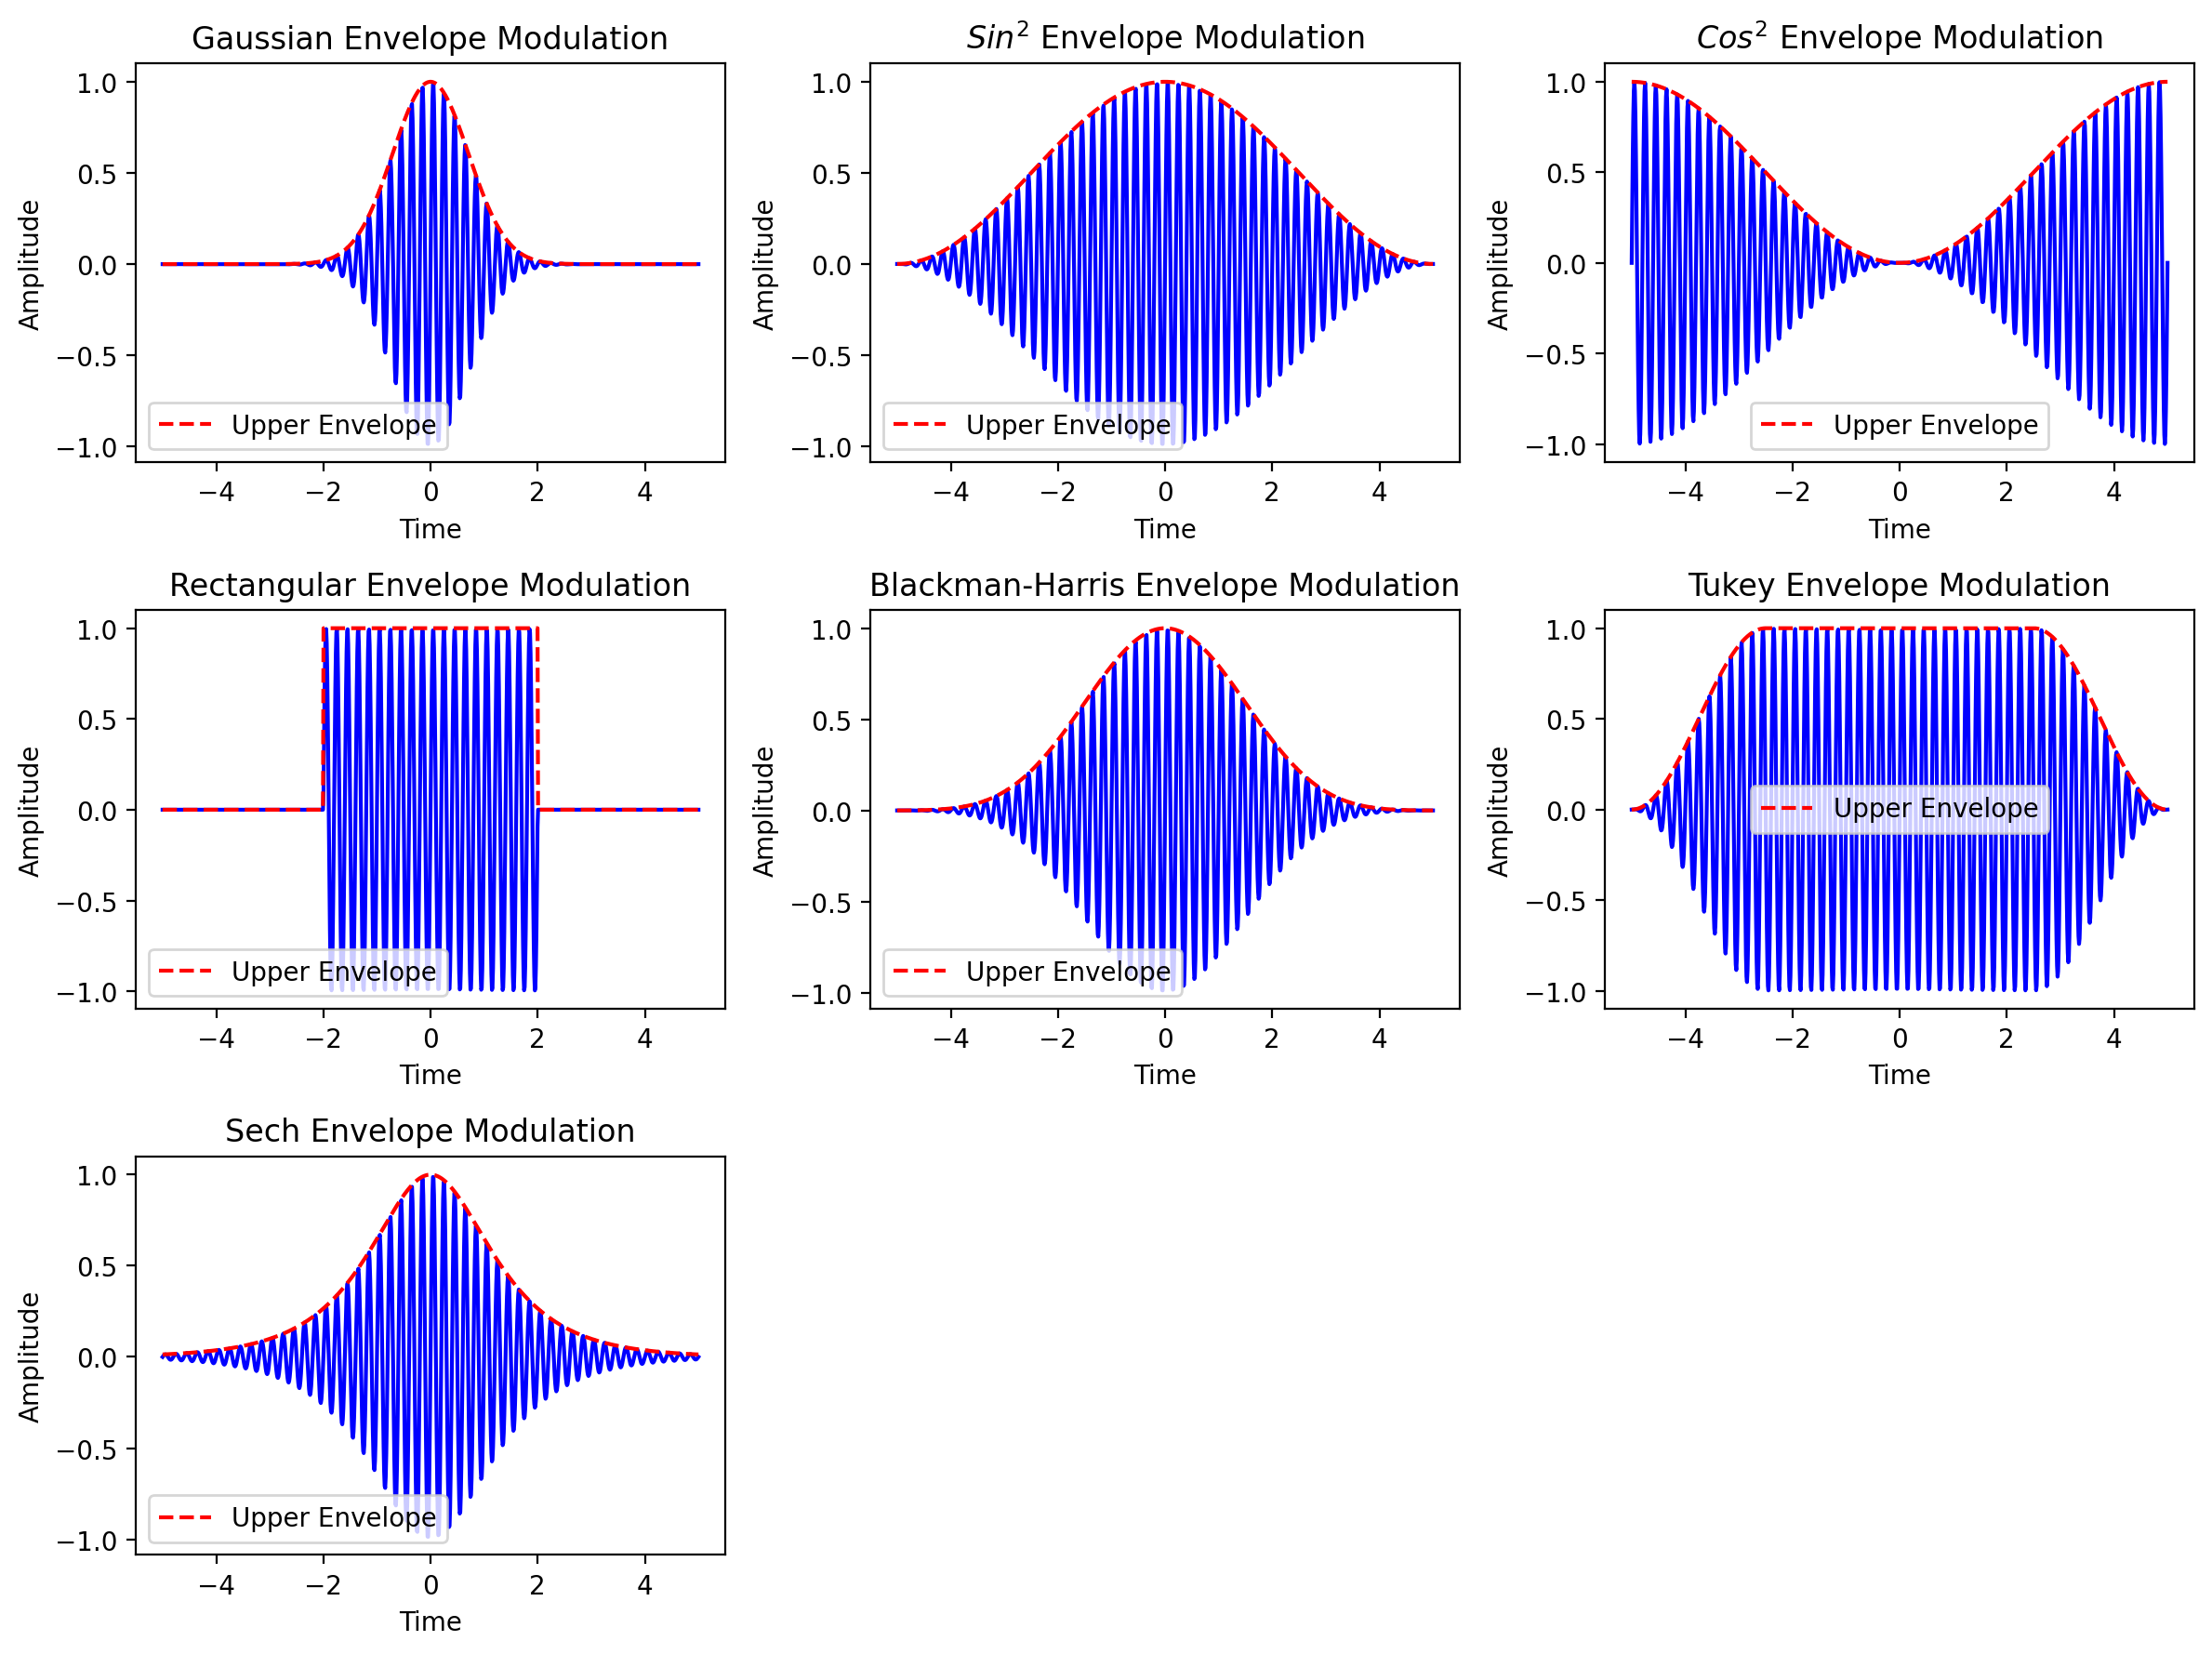

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, tukey

# Define time vector
time = np.linspace(-5, 5, 1000)

# Define different pulse envelopes
gaussian = np.exp(-time**2)
sin2 = np.sin(np.pi * (time - time.min()) / (time.max() - time.min()))**2
cos2 = np.cos(np.pi * (time - time.min()) / (time.max() - time.min()))**2
rectangular = np.ones_like(time)
rectangular[np.abs(time) > 2] = 0
blackman_harris = blackmanharris(len(time))
tukey_envelope = tukey(len(time), alpha=0.5)
sech = 1 / np.cosh(time)

# Define sine wave parameters
amplitude = 1
frequency = 5  # Frequency of the sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# List of envelopes and titles
envelopes = [(gaussian, "Gaussian Envelope Modulation"),
             (sin2, "$Sin^{2}$ Envelope Modulation"),
             (cos2, "$Cos^{2}$ Envelope Modulation"),
             (rectangular, "Rectangular Envelope Modulation"),
             (blackman_harris, "Blackman-Harris Envelope Modulation"),
             (tukey_envelope, "Tukey Envelope Modulation"),
             (sech, "Sech Envelope Modulation")]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

for i, (envelope, title) in enumerate(envelopes):
    modulated_wave = envelope * sine_wave
    axes[i].plot(time, modulated_wave, 'b',)
    axes[i].plot(time, envelope, 'r', linestyle='--', label='Upper Envelope')
    axes[i].set_title(title)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
